In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from math import log2, ceil,floor
import os
from PIL import Image
import requests
from io import BytesIO
import random

In [2]:
def FSCS(I):
    k = 255
    a = np.min(I)
    b = np.max(I)
    p = (k)/(b-a)
    l = a*k
    l/=(b-a)
    temp = np.zeros(I.shape)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            temp[i,j] = p*I[i,j] - l
            
    return np.array(np.round(temp),dtype=np.uint8)

def logcompression(I):
    I = np.array(I, dtype=np.int64)
    I = np.log2(I+1)
    I = np.array(I)
    return FSCS(I)
def eq(I,I1):
    for i in range(I.shape[0]):
        for j in range(I.shape[0]):
            if(I[i,j]-I1[i,j] > 1e-3):
                print(i,j,I[i,j]-I1[i,j])
                return False
    return True

In [3]:
#ADD IMAGE URL HERE TO RUN COMPLETE CODE
#NO NEED TO DOWNLOAD IMAGE THE SCRIPT WILL AUTOMATICALLY
ImagePath="http://sipi.usc.edu/database/download.php?vol=misc&img=5.1.11"

# 2D-DFT

In [4]:
def DFT(I):
    ''' Brute Force Double Summation Implementation of DFT'''
    N = I.shape[0]
    I2 = np.zeros((N,N),dtype=np.complex)
    for u in range(N):
        for v in range(N):
            for i in range(N):
                for j in range(N):
                    I2[u,v] += I[i,j]*np.exp(-2j*np.pi*(u*i+v*j)/N)
    return I2
def IDFT(I):
    ''' Brute Force Double Summation Implementation of IDFT'''
    N = I.shape[0]
    I2 = np.zeros(I.shape,dtype=np.complex)
    for u in range(N):
        for v in range(N):
            for i in range(N):
                for j in range(N):
                    I2[u,v] += I[i,j]*np.exp(2j*np.pi*(u*i+v*j)/N)
    return I2/(N*N)
def DFT2(I):
    ''' Matrix Implementation of DFT'''
    N = I.shape[0]
    Wi = np.zeros((N,N),dtype= np.complex)
    for i in range(N):
        for j in range(N):
            Wi[i,j] = np.exp(2j*np.pi*(-i*j/N))
    I = np.matmul(Wi,I)
    I = np.matmul(I,Wi)
    return I
def IDFT2(I):
    ''' Matrix Implementation of IDFT'''
    N = I.shape[0]
    Wi = np.zeros((N,N),dtype= np.complex)
    for i in range(N):
        for j in range(N):
            Wi[i,j] = np.exp(2j*np.pi*(i*j/N))
    I = np.matmul(Wi,I)
    I = np.matmul(I,Wi)
    return I

In [5]:
#Downloading and loading image from URL
response = requests.get(ImagePath)
I = Image.open(BytesIO(response.content)).convert('L')
I = np.array(I)
print(I.shape)


(256, 256)


In [6]:
fftI = DFT2(I)
ifftI = np.real(IDFT2(fftI))

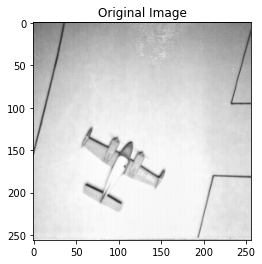

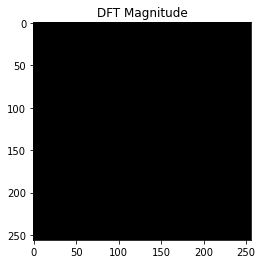

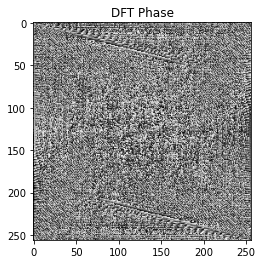

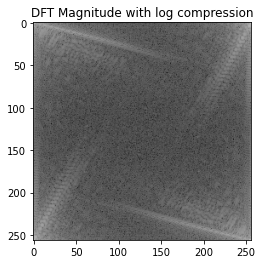

In [7]:
plt.title("Original Image")
plt.imshow(I,cmap=plt.get_cmap('gray'))
plt.show()
plt.title("DFT Magnitude")
plt.imshow(np.abs(fftI),cmap=plt.get_cmap('gray'))
plt.show()
plt.title("DFT Phase")
plt.imshow(np.angle(fftI),cmap=plt.get_cmap('gray'))
plt.show()
plt.title("DFT Magnitude with log compression")
plt.imshow(logcompression(np.abs(fftI)),cmap=plt.get_cmap('gray'))
plt.show()

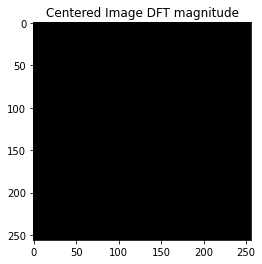

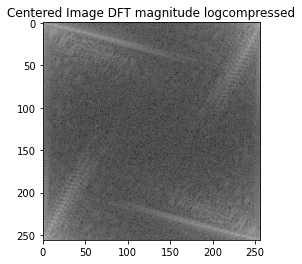

In [8]:
#Centered -1^(i+j) * I
I2 = np.zeros(I.shape)
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        I2[i,j] = -1**(i+j) * I[i,j]
plt.title("Centered Image DFT magnitude")
plt.imshow(np.abs(DFT2(I)),cmap=plt.get_cmap('gray'))
plt.show()
plt.title("Centered Image DFT magnitude logcompressed")
plt.imshow(logcompression(np.abs(DFT2(I))),cmap=plt.get_cmap('gray'))
plt.show()

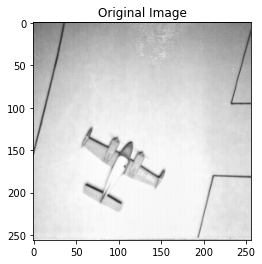

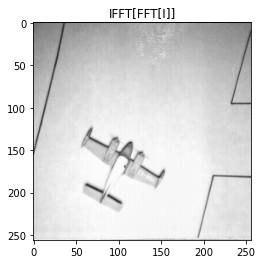

Equality check :  True


In [9]:
plt.title("Original Image")
plt.imshow(I,cmap=plt.get_cmap('gray'))
plt.show()
plt.title("IFFT[FFT[I]]")
plt.imshow(ifftI,cmap=plt.get_cmap('gray'))
plt.show()

print("Equality check : " ,eq(I,ifftI))

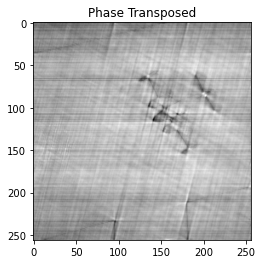

In [10]:
mag = np.abs(fftI)
phase = np.angle(fftI)
phase_1 = np.transpose(phase)
I_1 = IDFT2(mag*np.exp(1j*phase_1))
plt.title("Phase Transposed")
plt.imshow(np.real(I_1),cmap=plt.get_cmap('gray'))
plt.show()

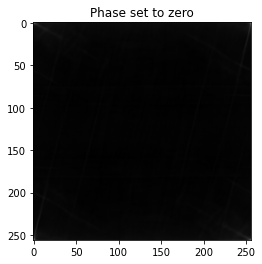

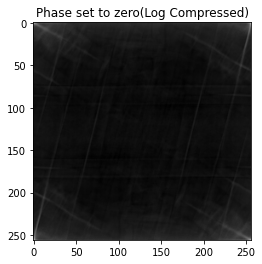

In [11]:
phase_2 = phase*0
I_2 = IDFT2(mag*np.exp(1j*phase_2))
plt.title("Phase set to zero")
plt.imshow(np.real(I_2),cmap=plt.get_cmap('gray'))
plt.show()
plt.title("Phase set to zero(Log Compressed)")
plt.imshow(logcompression(np.real(I_2)),cmap=plt.get_cmap('gray'))
plt.show()

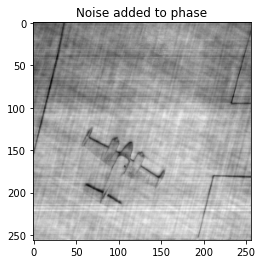

In [12]:
phase_3 = phase + np.random.normal(size=phase.shape)
I_3 = IDFT2(mag*np.exp(1j*phase_3))
plt.title("Noise added to phase")
plt.imshow(np.real(I_3),cmap=plt.get_cmap('gray'))
plt.show()

# Periodic Convolution

In [13]:
def circular_conv(I1,I2):
    #Circular Convolution
    m1,n1 = I1.shape
    m2,n2 = I2.shape
    Ans = np.zeros(I1.shape)
    I1 = np.append(I1,I1,axis=0)
    I1 = np.append(I1,I1,axis=1)
    for i in range(m1):
        for j in range(n1):
            W1 = I1[i:i+m2 , j:j+n2] * I2
            Ans[i,j] = np.sum(W1)
    return Ans
            

In [14]:
Filter = np.ones((5,5))/25
I3 = circular_conv(I,Filter)

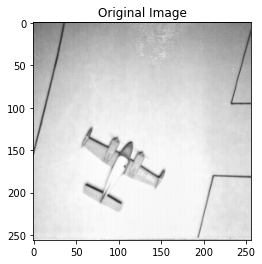

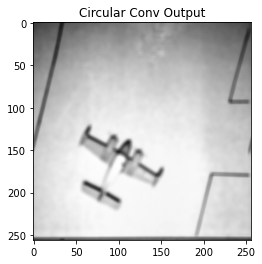

In [15]:
plt.title("Original Image")
plt.imshow(I,cmap=plt.get_cmap('gray'))
plt.show()
plt.title("Circular Conv Output")
plt.imshow(I3,cmap=plt.get_cmap('gray'))
plt.show()

In [16]:
paddedI = np.pad(I,((0,I.shape[0]),(0,I.shape[1]))) #Padding image to perform linear conv
I4 = circular_conv(paddedI , Filter)[:I.shape[0],:I.shape[1]]

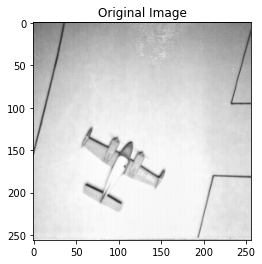

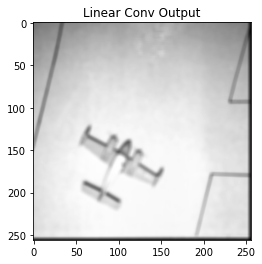

In [17]:
plt.title("Original Image")
plt.imshow(I,cmap=plt.get_cmap('gray'))
plt.show()
plt.title("Linear Conv Output")
plt.imshow(I4,cmap=plt.get_cmap('gray'))
plt.show()

In [18]:
def circular_conv2(I1,I2):
    #Circular convolution DFT approach
    m1,n1 = I1.shape
    m2,n2 = I2.shape
    Ans = np.zeros(I1.shape)
    I2 = np.pad(I2, ((m1-m2,0) , (n1-n2,0)) )
    I1 = DFT2(I1)
    I2 = DFT2(I2)
    Ans = IDFT2(I1*I2)
    return np.real(Ans)

In [19]:
I5 = circular_conv2(paddedI,Filter)[:I.shape[0],:I.shape[1]]

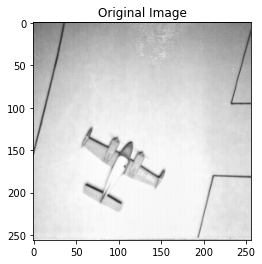

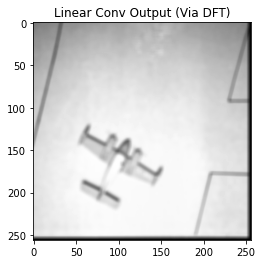

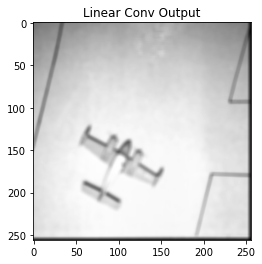

Equality :  True


In [20]:
plt.title("Original Image")
plt.imshow(I,cmap=plt.get_cmap('gray'))
plt.show()
plt.title("Linear Conv Output (Via DFT)")
plt.imshow(I5,cmap=plt.get_cmap('gray'))
plt.show()
plt.title("Linear Conv Output")
plt.imshow(I4,cmap=plt.get_cmap('gray'))
plt.show()
print("Equality : " , eq(I4[:-5,:-5],I5[:-5,:-5]))

# Image Denoising using Linear Filters

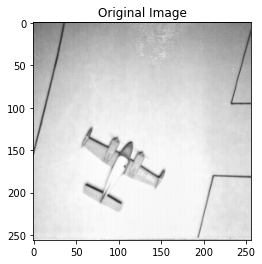

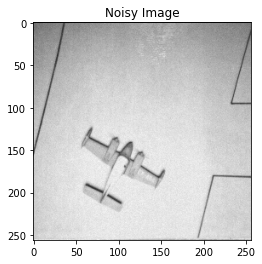

In [21]:
I_ = I+np.random.normal(0,5,size = I.shape)
plt.title("Original Image")
plt.imshow(I,cmap=plt.get_cmap('gray'))
plt.show()
plt.title("Noisy Image")
plt.imshow(I_,cmap=plt.get_cmap('gray'))
plt.show()


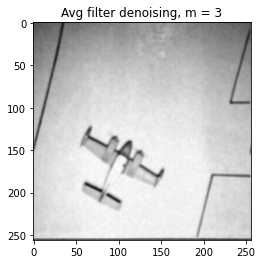

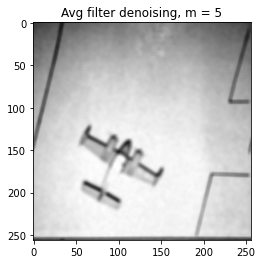

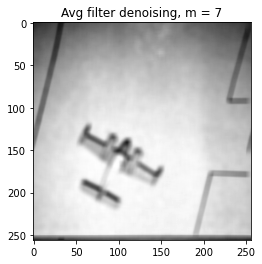

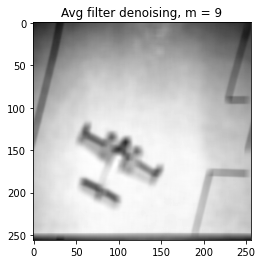

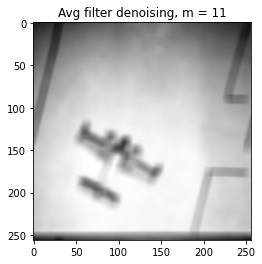

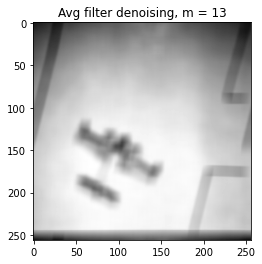

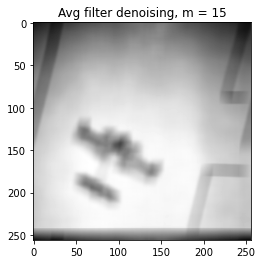

In [22]:
for m in range(3,16,2):
    avg_filter = np.ones((m,m))/(m**2) #Average denoising filter
    I6 = circular_conv(I_,avg_filter)
    plt.title("Avg filter denoising, m = " + str(m))
    plt.imshow(I6,cmap=plt.get_cmap('gray'))
    plt.show()

m = 3 seems ideal for this noise lvl

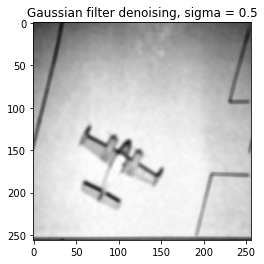

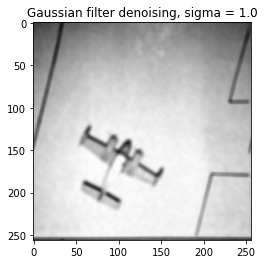

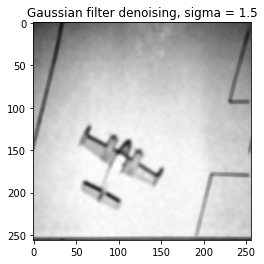

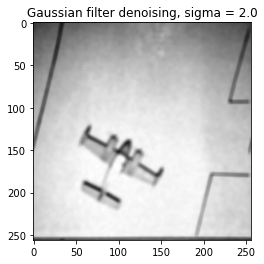

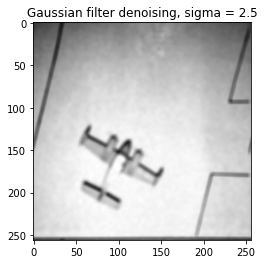

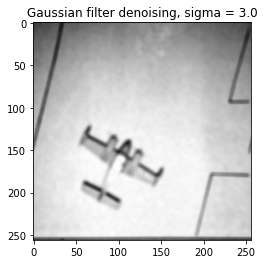

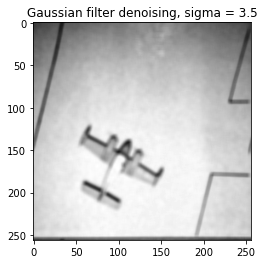

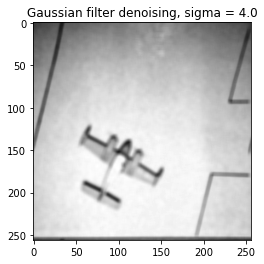

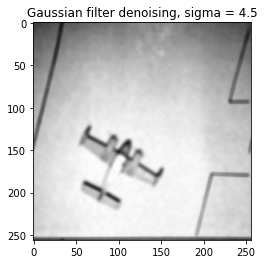

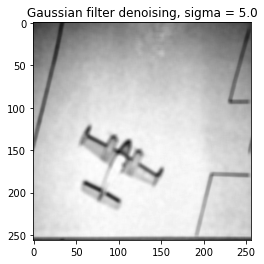

In [23]:
l = np.linspace(0,24,25)
l = l.reshape(5,5)
u = l//5
v = l%5
uu = (u**2 + v**2)/(I_.shape[0]**2)

for sigma in range(1,11,1):
    sigma = sigma/2
    gaus_filter = np.exp(-2*np.pi*(sigma**2)*uu) #Gaussian denoising filter
    I6 = circular_conv(I_,gaus_filter)
    plt.title("Gaussian filter denoising, sigma = " + str(sigma))
    plt.imshow(I6,cmap=plt.get_cmap('gray'))
    plt.show()